In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

from sklearn.model_selection import cross_validate, KFold, learning_curve,  cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import scale
from sklearn import metrics

In [2]:
# dataload
data_2010s = pd.read_csv('dataset/dataset-of-10s.csv')
data_2000s = pd.read_csv('dataset/dataset-of-00s.csv')
data_1990s = pd.read_csv('dataset/dataset-of-90s.csv')
data_1980s = pd.read_csv('dataset/dataset-of-80s.csv')

In [3]:
# checking null data
data_2010s.isnull().sum()
data_2000s.isnull().sum()
data_1990s.isnull().sum()
data_1980s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [4]:
# add column for year
data_2010s["year"] = 2010
data_2000s["year"] = 2000
data_1990s["year"] = 1990
data_1980s["year"] = 1980

In [5]:
# combining all data
df_list = [data_2010s, data_2000s, data_1990s, data_1980s]
data = pd.concat(df_list)


In [6]:
# revise and add column for song's duration 
data["duration_s"] = data["duration_ms"]/1000


In [7]:
# devide hits and flot data in case
hits = data[data["target"] == 1]
flop = data[data["target"] == 0]


In [8]:
# overall describe varibles 
data_description = data.describe()
data_description


danceability        energy           key      loudness          mode  \
count  24698.000000  24698.000000  24698.000000  24698.000000  24698.000000   
mean       0.560788      0.642772      5.263220     -9.113158      0.662564   
std        0.183826      0.246324      3.572534      5.277124      0.472845   
min        0.057600      0.000251      0.000000    -49.253000      0.000000   
25%        0.442000      0.485000      2.000000    -11.417750      0.000000   
50%        0.579000      0.684000      5.000000     -7.765000      1.000000   
75%        0.695000      0.843000      8.000000     -5.465000      1.000000   
max        0.988000      1.000000     11.000000      1.137000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  24698.000000  24698.000000      24698.000000  24698.000000   
mean       0.080085      0.254221          0.153554      0.197884   
std        0.085404      0.307256          0.303221      0.171552   
min        0.022000      0.000000          0.000000      0.013000   
25%        0.034600      0.012900          0.000000      0.091500   
50%        0.046700      0.104000          0.000093      0.128000   
75%        0.082700      0.417000          0.056075      0.260000   
max        0.956000      0.996000          1.000000      0.997000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  24698.000000  24698.000000  2.469800e+04    24698.000000  24698.000000   
mean       0.514222    120.915787  2.512168e+05        3.923719     40.595865   
std        0.261718     29.133453  1.105231e+05        0.373012     19.702683   
min        0.000000     34.535000  1.592000e+04        0.000000      0.000000   
25%        0.302000     98.385250  2.008900e+05        4.000000     27.775602   
50%        0.524000    119.773000  2.357935e+05        4.000000     36.057290   
75%        0.731000    138.832500  2.798930e+05        4.000000     48.027440   
max        0.996000    217.943000  4.170227e+06        5.000000    433.182000   

           sections       target          year    duration_s  
count  24698.000000  24698.00000  24698.000000  24698.000000  
mean      10.942789      0.50000   1994.761519    251.216837  
std        4.669843      0.50001     11.519467    110.523055  
min        1.000000      0.00000   1980.000000     15.920000  
25%        9.000000      0.00000   1980.000000    200.890000  
50%       10.000000      0.50000   1990.000000    235.793500  
75%       12.000000      1.00000   2010.000000    279.893000  
max      169.000000      1.00000   2010.000000   4170.227000

In [9]:
# numerical data 
# variables
var_list = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit', 'duration_s']


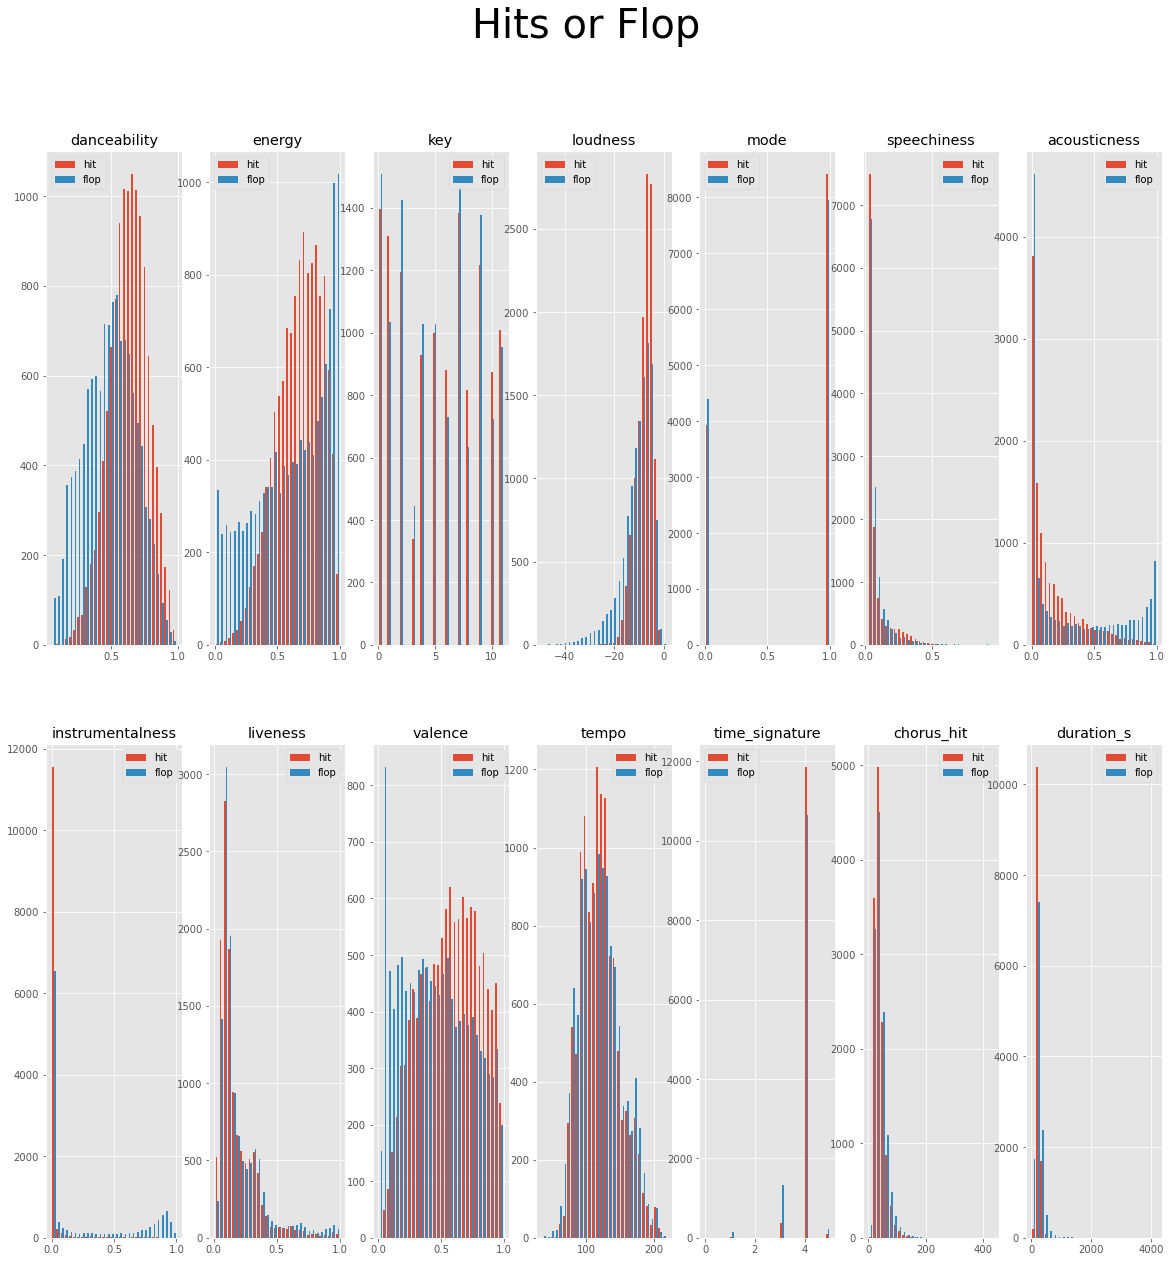

In [10]:
# hits and flop histogram
plt.style.use('ggplot')
fig, ax = plt.subplots(2, 7, figsize=(20, 20))
fig.suptitle('Hits or Flop', fontsize=40)

column_idx = 0
for i in range(2):
    for j in range(7):
        ax[i][j].hist([hits[var_list[column_idx]], flop[var_list[column_idx]]], bins=30, label=['hit', 'flop'])
        ax[i][j].set_title(var_list[column_idx])
        ax[i][j].legend()
        column_idx += 1
plt.show();
# plt.savefig('image1.png', facecolor='white')

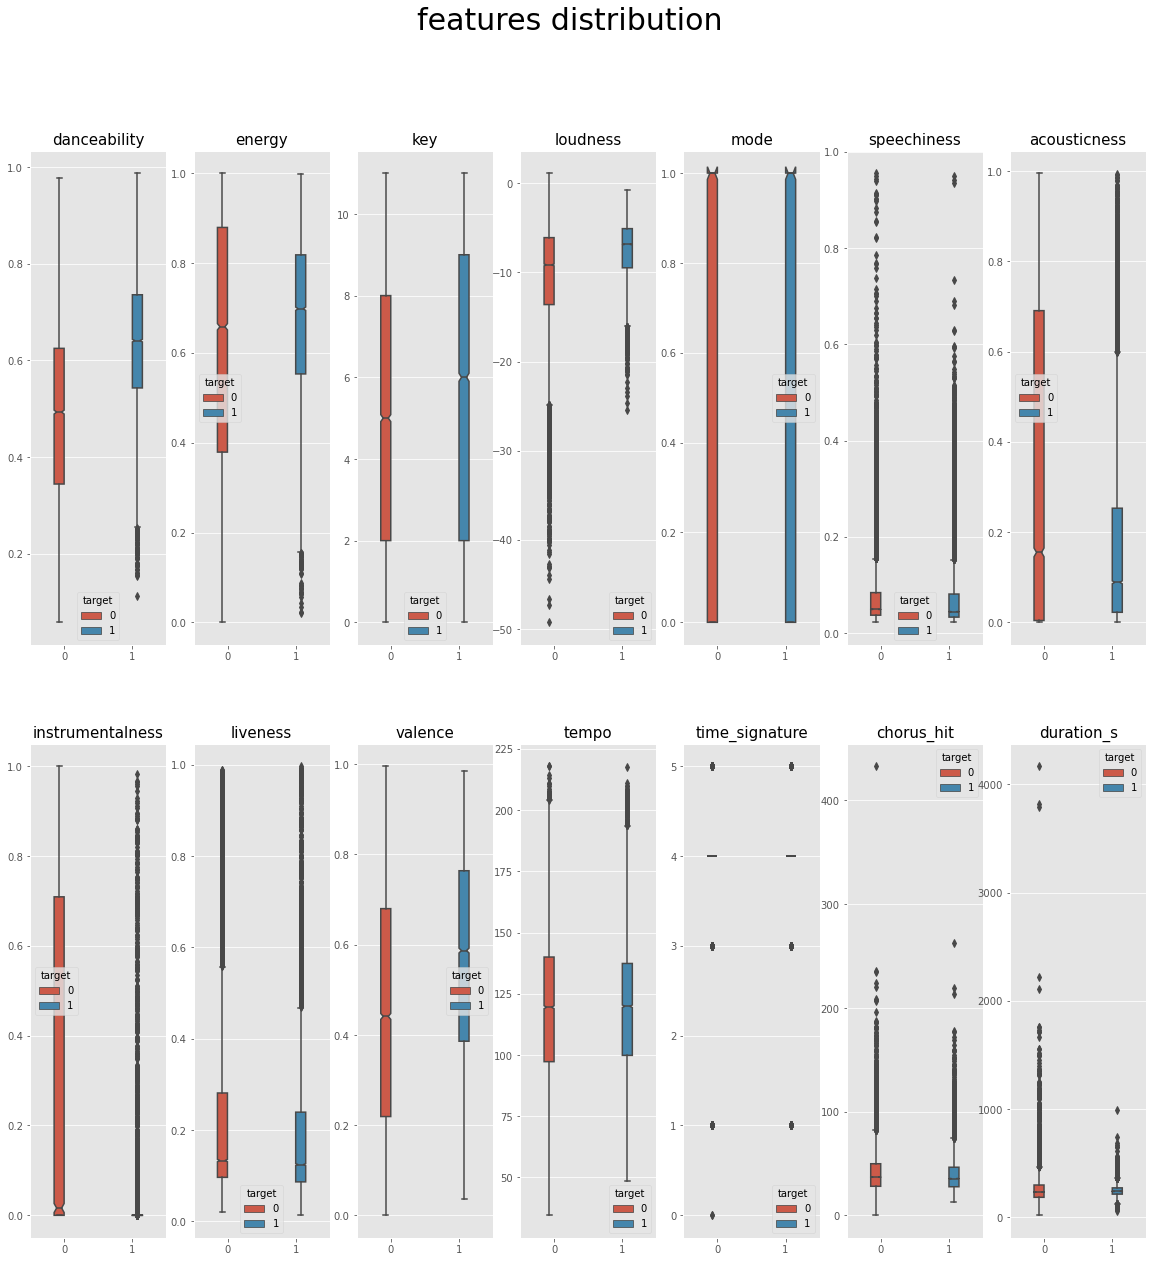

In [11]:
# features distribution boxplot 
# plt.style.use('ggplot')
fig, axes = plt.subplots(2, 7, figsize = (20, 20))
fig.suptitle('features distribution', fontsize = 30)

column_idx = 0
for i in range(2):
  for j in range(7):
    sns.boxplot(x = data['target'], y = data[var_list[column_idx]], hue = data['target'], notch = True, width = 0.3, ax = axes[i][j]).set_title(var_list[column_idx], fontsize = 15)
    axes[i][j].set_xlabel('')
    axes[i][j].set_ylabel('')
    column_idx +=1
plt.show();
# plt.savefig('image2.png', facecolor='white')

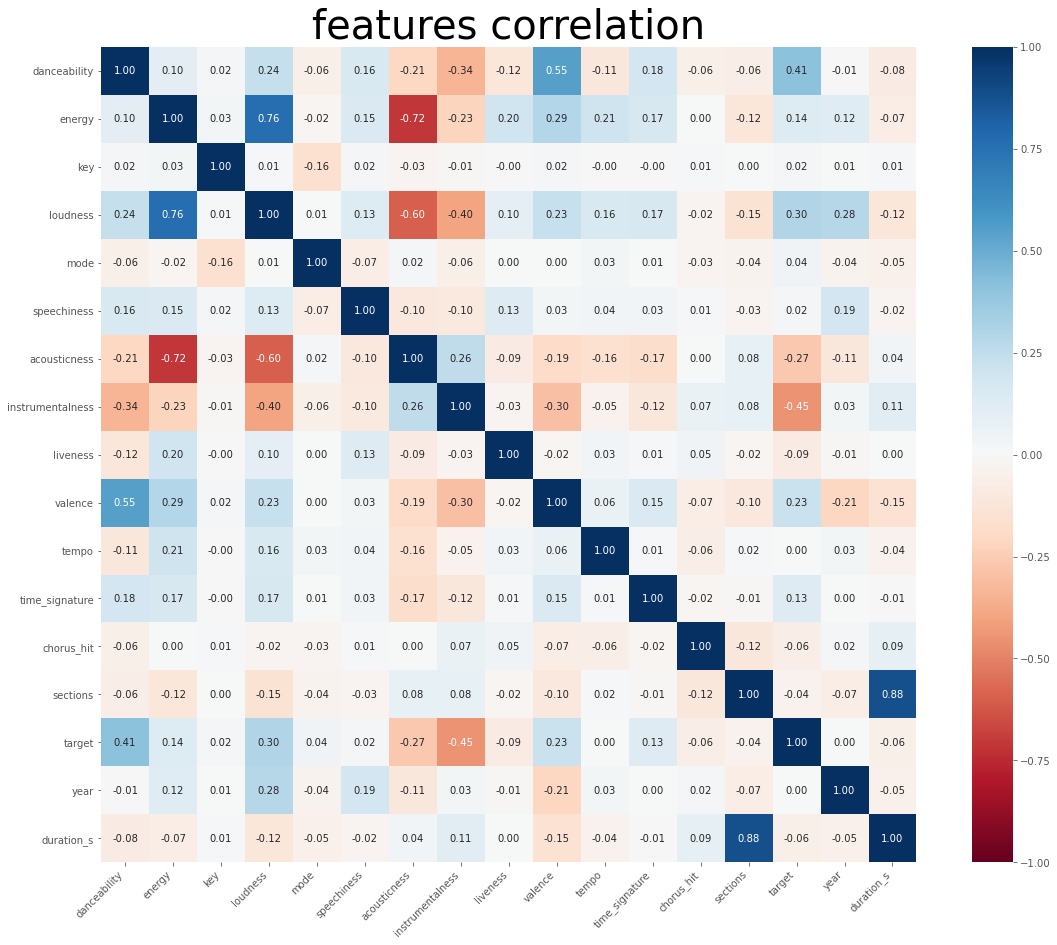

In [13]:
# variables correlation heatmap
data_corr = data.drop(['duration_ms'], axis=1)
corr = data_corr.corr()
# plt.style.use('ggplot')
plt.figure(figsize=(20, 15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, cmap='RdBu', annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('features correlation', fontsize=40)
plt.show();
# plt.savefig('image3.png', facecolor='white')

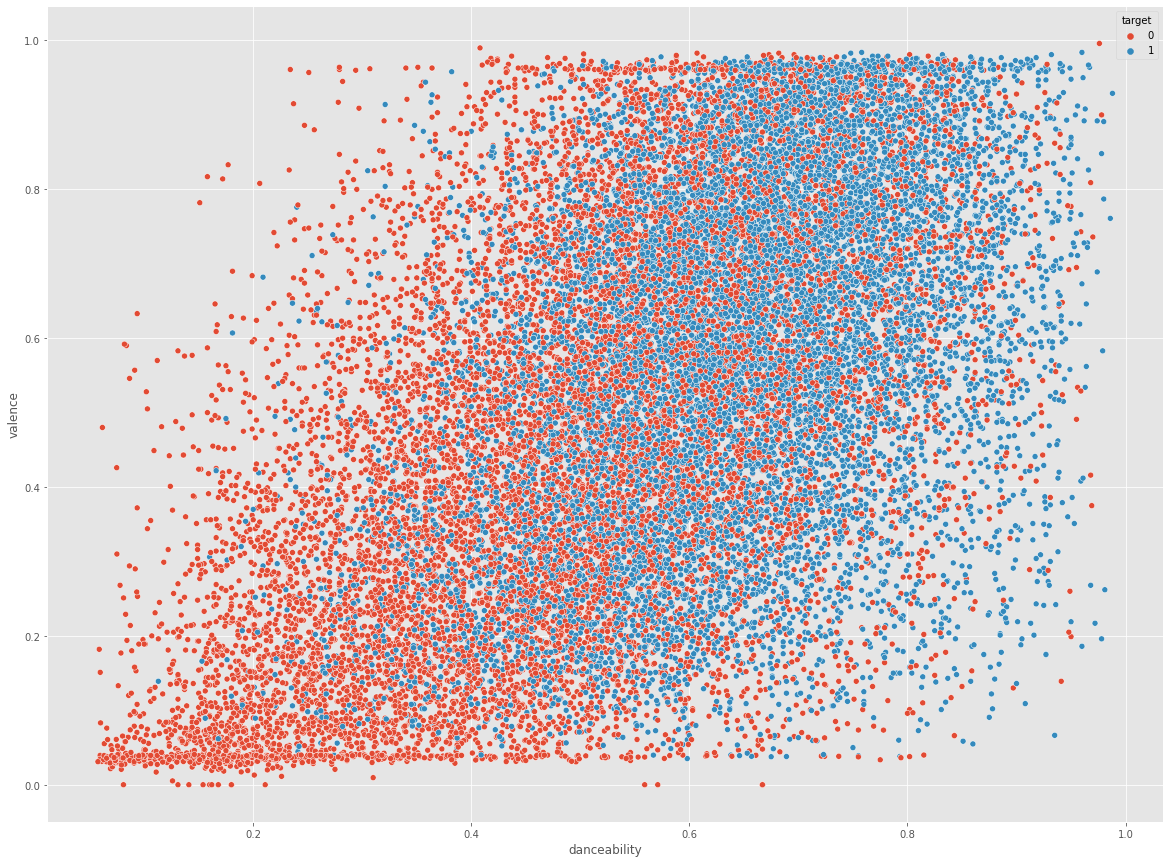

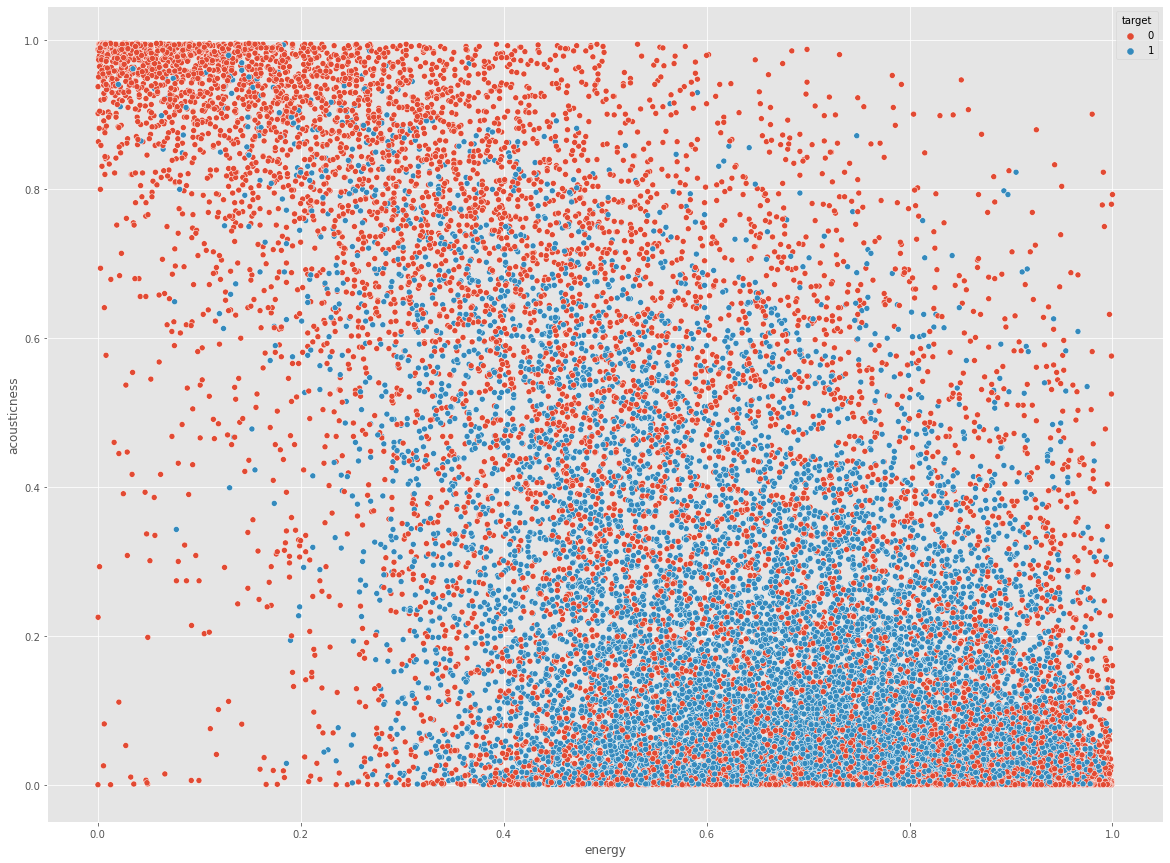

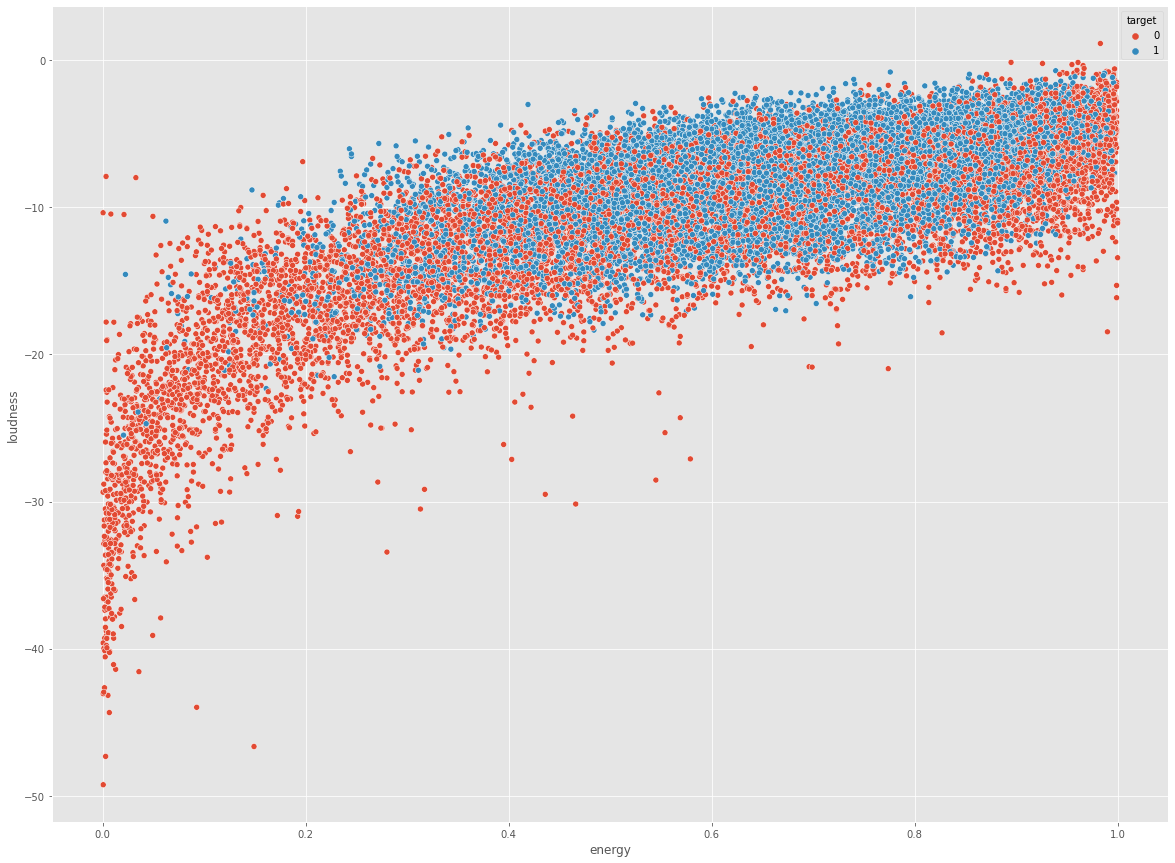

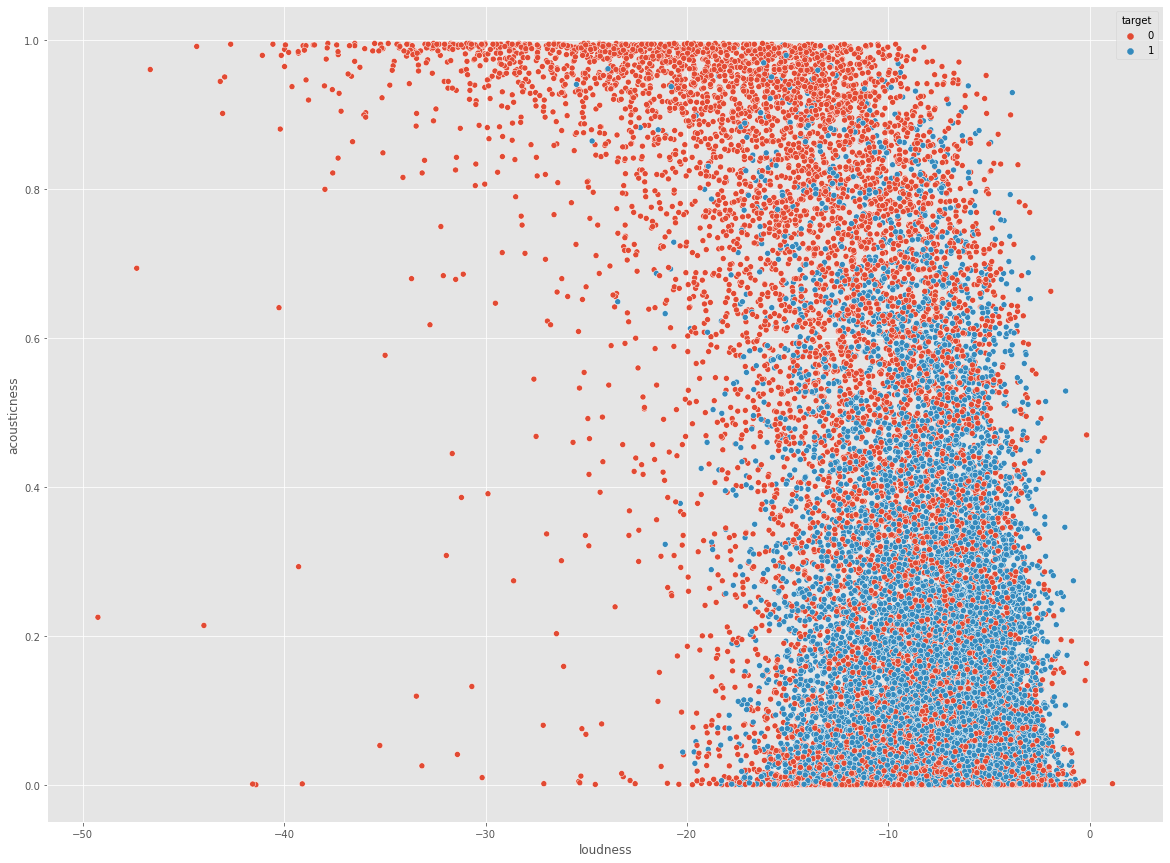

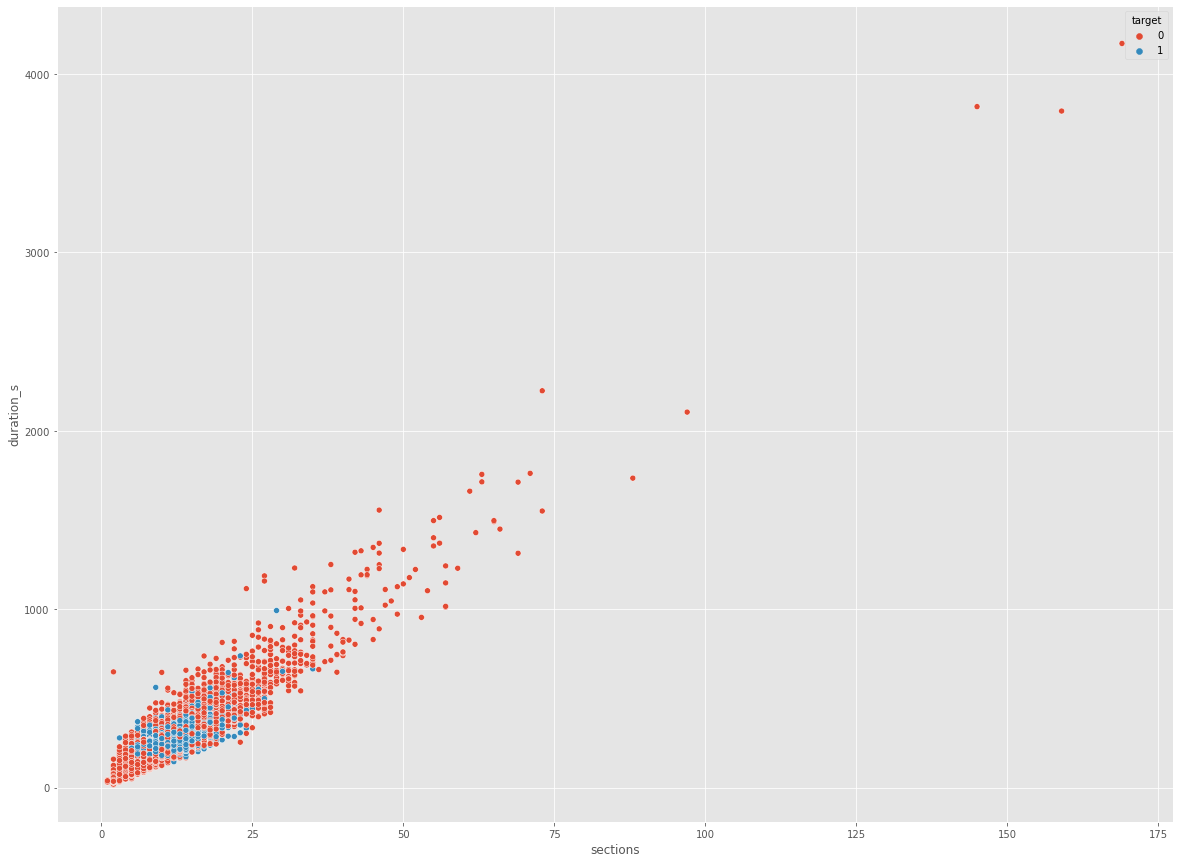

In [14]:
# variable's correaltion over 0.5 
def var_scatter(x, y, num):
    plt.figure(figsize=(20, 15))
    sns.scatterplot(x=x, y=y, hue=data['target'])
    plt.show();
#     plt.savefig(f'scatter{num}.png', facecolor='white')

# danceability vs valence
var_scatter(data['danceability'], data['valence'], 1)

# energy vs acousticness, loudness
var_scatter(data['energy'], data['acousticness'], 2)
var_scatter(data['energy'], data['loudness'], 3)

# loudness vs acousticness
var_scatter(data['loudness'], data['acousticness'], 4)

# sections vs duration_s
var_scatter(data['sections'], data['duration_s'], 5)

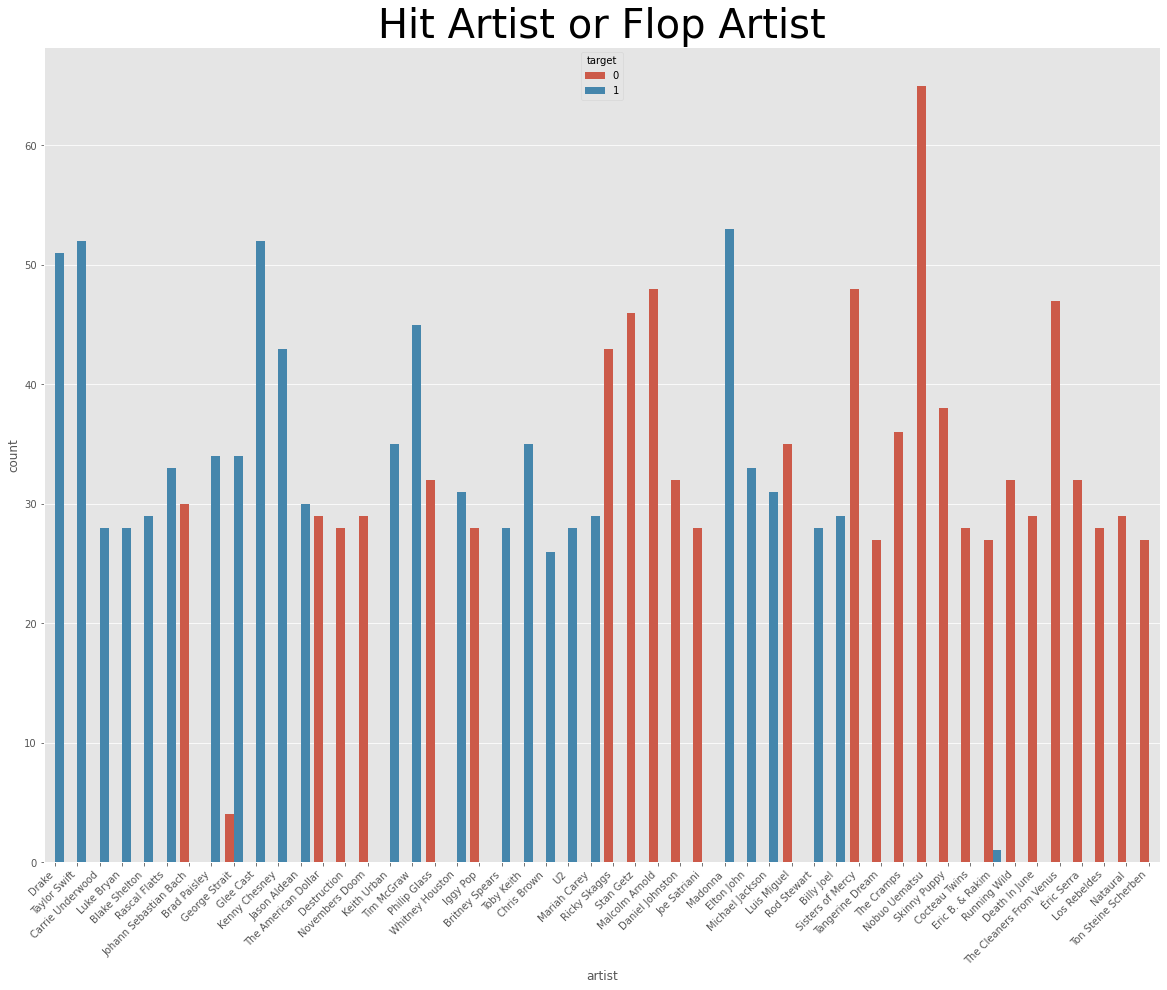

In [15]:
# categorical data
# hit or flop artist by track
data_hits = data.groupby('artist')['track'].agg(len).sort_values(ascending = False).to_frame().reset_index()
# artist_hits = hits.groupby('artist')['track'].agg(len).sort_values(ascending = False).to_frame().reset_index()
# flop_hits = flop.groupby('artist')['track'].agg(len).sort_values(ascending = False).to_frame().reset_index()

artist_list = data_hits[:50]['artist']
data_hits50 = data.loc[data['artist'].isin(artist_list)]

plt.figure(figsize=(20, 15))
g = sns.countplot(x=data_hits50['artist'], hue=data_hits50['target'])
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right')
plt.title("Hit Artist or Flop Artist", fontsize=40)
plt.show();
# plt.savefig('image4.png', facecolor='white')

In [16]:
# modeling
X = data[var_list]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [17]:
# classifiers
# Desicion tree classifier
""" 
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 
Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. 
The deeper the tree, the more complex the decision rules and the fitter the model. 
"""
# Support Vector Machines
""" 
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
The advantages of support vector machines are:
1. Effective in high dimensional spaces.
2. Still effective in cases where number of dimensions is greater than the number of samples.
3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
4. Versatile: different Kernel functions can be specified for the decision function. 
   Common kernels are provided, but it is also possible to specify custom kernels.
""" 
# Random forest classifier
"""
The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. 
Both algorithms are perturb-and-combine technique specifically designed for trees. 
This means a diverse set of classifiers is created by introducing randomness in the classifier construction. 
The prediction of the ensemble is given as the averaged prediction of the individual classifiers.
"""
# Ada boost classifier
"""
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset 
but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
"""
# MLP Classifier
"""
Multi-layer Perceptron classifier. This model optimizes the log-loss function using LBFGS or stochastic gradient descent.
"""
# GaussianNB
"""
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.
"""

# build
dectree = DecisionTreeClassifier(random_state=42)
svc = SVC()
randfclass = RandomForestClassifier(random_state=42)
adaclass = AdaBoostClassifier(random_state=42)
mlpclass = MLPClassifier(random_state=42)
gsclass = GaussianNB()

cv = KFold(5, shuffle=True, random_state=42)
classifiers = [dectree, svc, randfclass, adaclass, mlpclass, gsclass]
classifiers_name = ['DecisionTreeClassifier', 'SVC', 'RandomForestClassifier', 'AdaBoostClassifier', 'MLPClassifier', 'GaussianNB']

In [18]:
# A function for testing classifiers result table (sorted by f1 score)
def model_check(X, y, classifiers, cv):    
    model_table = pd.DataFrame()
    idx = 0
    for cls in classifiers:
    
        model_table.loc[idx, 'Model Name'] = classifiers_name[idx]
        
        cv_results = cross_validate(
            cls,
            X,
            y,
            cv=cv,
            scoring=('accuracy','f1','roc_auc'),
            return_train_score=True,
            n_jobs=-1
        )
        model_table.loc[idx, 'Train Roc/AUC Mean'] = cv_results['train_roc_auc'].mean()
        model_table.loc[idx, 'Test Roc/AUC Mean'] = cv_results['test_roc_auc'].mean()
        model_table.loc[idx, 'Test Roc/AUC Std'] = cv_results['test_roc_auc'].std()
        model_table.loc[idx, 'Train Accuracy Mean'] = cv_results['train_accuracy'].mean()
        model_table.loc[idx, 'Test Accuracy Mean'] = cv_results['test_accuracy'].mean()
        model_table.loc[idx, 'Test Acc Std'] = cv_results['test_accuracy'].std()
        model_table.loc[idx, 'Train F1 Mean'] = cv_results['train_f1'].mean()
        model_table.loc[idx, 'Test F1 Mean'] = cv_results['test_f1'].mean()
        model_table.loc[idx, 'Test F1 Std'] = cv_results['test_f1'].std()
        model_table.loc[idx, 'Time'] = cv_results['fit_time'].mean()

        idx += 1        

    model_table.sort_values(by=['Test F1 Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

In [19]:
# A function for learning curve plot
def plot_learning_curve(classifiers,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):

    fig, axes = plt.subplots(3, 2, figsize=(20, 25))
    axes = axes.flatten()
    
    for ax, classifier in zip(axes, classifiers):

        ax.set_title(f'{classifier.__class__.__name__} Learning Curve')
        if ylim is not None:
            ax.set_ylim(*ylim)
        ax.set_xlabel('Training examples')
        ax.set_ylabel('Score')

        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(classifier, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True, scoring='f1', random_state=42)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        ax.fill_between(train_sizes,
                        train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std,
                        alpha=0.1,
                        color='r')
        ax.fill_between(train_sizes,
                        test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std,
                        alpha=0.1,
                        color='b')
        ax.plot(train_sizes,
                train_scores_mean,
                'o-',
                color='r',
                label='Training score')
        ax.plot(train_sizes,
                test_scores_mean,
                'o-',
                color='g',
                label='Cross-validation score')
        ax.legend(loc='best')
    plt.show();
#     plt.savefig('image5.png', facecolor='white')

In [20]:
# A function for confusion matrix
def plot_confusion_matrix(classifiers):   
    fig, axes = plt.subplots(3, 2, figsize = (20, 15), constrained_layout=True)  
    fig.suptitle('Confusion Matrix', fontsize = 30)

    idx = 0
    for i in range(3):
      for j in range(2):
        classifiers[idx].fit(X_train, y_train)
        y_pred = classifiers[idx].predict(X_test)
        cm = metrics.confusion_matrix(y_test, y_pred)

        sns.heatmap(pd.DataFrame(cm), annot=True, cmap='RdBu', fmt='g', ax = axes[i][j]).set_title(classifiers_name[idx])
        axes[i][j].set_ylabel('Actual label')
        axes[i][j].set_xlabel('Predicted label')
        idx += 1
    plt.show();
#     plt.savefig('image6.png', facecolor='white')

In [ ]:
classifiers_re = [dectree, randfclass, adaclass]
classifiers_name_re = ['DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier']

In [21]:
def feature_importance(classifier):
    fig, axes = plt.subplots(3, 1, figsize=(20,15), constrained_layout=True)
    fig.suptitle("Feature Importances", fontsize=30)
    for ax, classifier in zip(axes, classifiers_re):
        feature_imp = classifier.feature_importances_
        importances = pd.DataFrame()
        importances['variables'] = X.columns
        importances['feature'] = feature_imp
        importances = importances.sort_values(by=['feature'], ascending=False)

        sns.barplot(x='variables', y='feature', data=importances, palette="vlag", ax=ax)
        ax.set_title(f'{classifier.__class__.__name__}')
    plt.show();
#     plt.savefig('image7.png', facecolor='white')

In [22]:
# ML algorithms testing results
model_check(X, y, classifiers, cv)

Model Name  Train Roc/AUC Mean  Test Roc/AUC Mean  \
2  RandomForestClassifier            0.999998           0.895983   
3      AdaBoostClassifier            0.883040           0.874939   
4           MLPClassifier            0.865385           0.861813   
5              GaussianNB            0.834372           0.834161   
1                     SVC            0.747313           0.746449   
0  DecisionTreeClassifier            0.999998           0.739595   

   Test Roc/AUC Std  Train Accuracy Mean  Test Accuracy Mean  Test Acc Std  \
2          0.003454             0.999129            0.822536      0.005010   
3          0.005366             0.807930            0.801684      0.005072   
4          0.006997             0.786147            0.784355      0.008547   
5          0.002088             0.741133            0.741194      0.004228   
1          0.004055             0.691220            0.690663      0.002097   
0          0.006288             0.999140            0.738764      0.006318   

   Train F1 Mean  Test F1 Mean  Test F1 Std      Time  
2       0.999130      0.829534     0.005902  3.724772  
3       0.817884      0.811644     0.005330  0.984801  
4       0.793112      0.791809     0.018760  3.535709  
5       0.775672      0.775792     0.002926  0.005363  
1       0.738502      0.738116     0.002940  9.066793  
0       0.999138      0.737281     0.008727  0.258763

In [ ]:
# ML algorithms learning curve
plot_learning_curve(classifiers,
                    X,
                    y,
                    ylim=None,
                    cv=cv,
                    n_jobs=-1,
                    train_sizes=np.linspace(.1, 1.0, 10))

/Users/sol/miniforge3/envs/m1/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# ML algoritms confusion matrix
plot_confusion_matrix(classifiers)

In [ ]:
feature_importance(classifiers_re)